In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sft
import sklearn.linear_model as ls
import pandas as pd



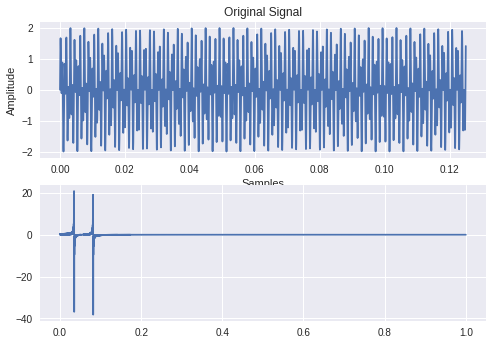

In [5]:
#defining the signals

n = 5000               #number of samples in total
x = np.linspace(0,1/8,n)
y = np.sin(1394*np.pi*x)+np.sin(3266*np.pi*x)
y_dct = sft.dct(y,norm='ortho')               #dct matrix of the signal
plt.subplot(211)
plt.plot(x,y)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.subplot(212)
plt.plot(np.linspace(0,1,n),y_dct)
plt.show()

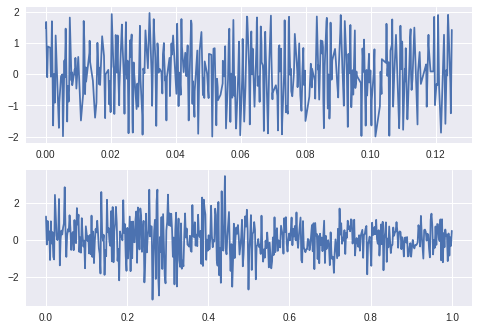

In [7]:
m = 500
ri = np.random.choice(n, m, replace=False)     #random samples of indices
ri.sort()
xc = x[ri]
yc = y[ri]
yc_dft = sft.dct(yc,norm='ortho')
plt.subplot(211)
plt.plot(xc,yc)
plt.subplot(212)
plt.plot(np.linspace(0,1,m),yc_dft)
plt.show()


In [0]:
A = sft.idct(np.identity(n),norm='ortho',axis=0)
A = A[ri]

In [0]:
lasso = ls.Lasso(alpha=0.0001,normalize=True, max_iter=1e5)
for i in range(10):
  lasso.fit(A,yc)


In [0]:
x = lasso.coef_
x = np.squeeze(x)
sig = sft.idct(x, norm='ortho', axis=0)


In [0]:
t = np.linspace(0,1/8,5000)

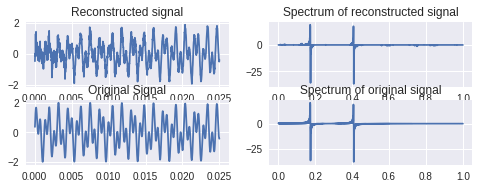

Error= 0.11266082475635424


In [67]:
plt.subplot(421)
plt.plot(t[1:1001],sig[1:1001])
plt.title('Reconstructed signal')
plt.subplot(422)
plt.plot(np.linspace(0,1,1000),x[1:1001])
plt.title('Spectrum of reconstructed signal')
plt.subplot(423)
plt.plot(t[1:1001],y[1:1001])
plt.title('Original Signal')
plt.subplot(424)
plt.plot(np.linspace(0,1,1000),y_dct[1:1001])
plt.title('Spectrum of original signal')


plt.show()
print('Error=',np.mean(np.abs(y-sig)))